<a href="https://colab.research.google.com/github/SHRAVAN-AMBEER/Machine-Learning-Lab/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

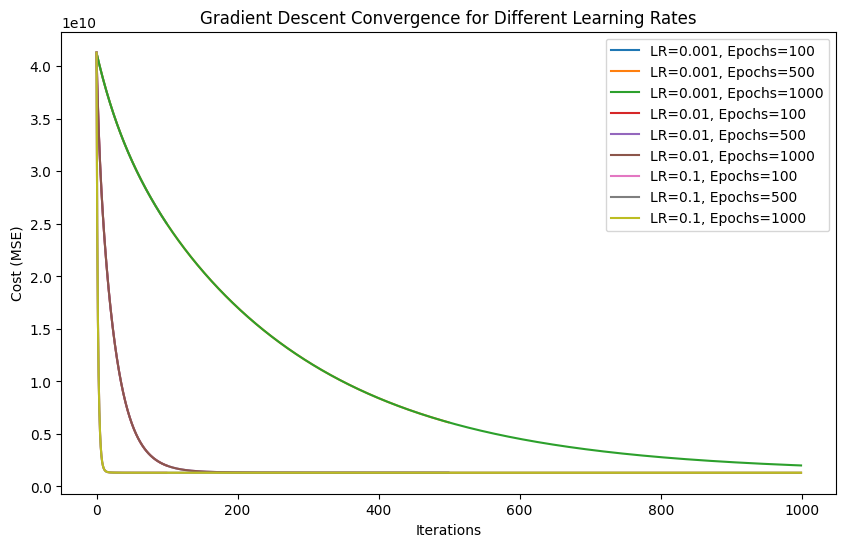


Final Parameters Shape: (38, 1)
Final Cost (MSE): 1310941124.179793


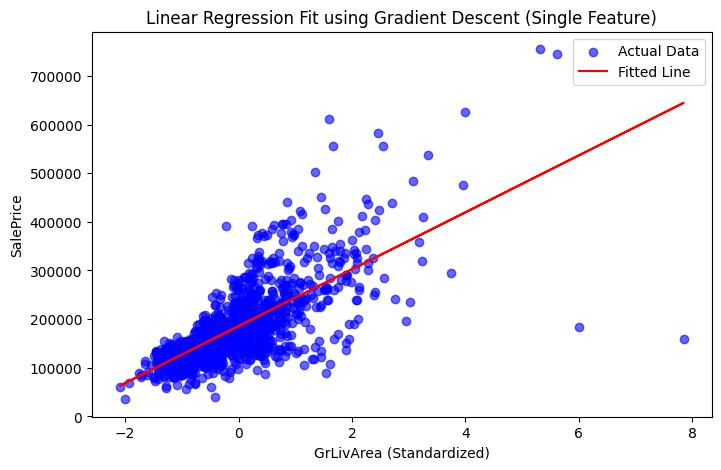

In [10]:
# 1.LINEAR REGRESSION WITH GRADIENT DESCENT

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/house_price_train.csv')

# Select numerical columns and drop missing values
df = df.select_dtypes(include=[np.number]).dropna()

# Split features and target
X = df.drop(columns=['SalePrice']).values
y = df['SalePrice'].values.reshape(-1, 1)

# Feature scaling (important for gradient descent)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term (intercept)
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    cost_history = []

    for i in range(epochs):
        predictions = X.dot(theta)
        error = predictions - y
        gradients = (2/m) * X.T.dot(error)
        theta -= lr * gradients
        cost = (1/m) * np.sum(error**2)
        cost_history.append(cost)

    return theta, cost_history

# Different learning rates and epochs
learning_rates = [0.001, 0.01, 0.1]
epochs_list = [100, 500, 1000]

plt.figure(figsize=(10, 6))
for lr in learning_rates:
    for ep in epochs_list:
        _, cost_history = gradient_descent(X_b, y, lr=lr, epochs=ep)
        plt.plot(cost_history, label=f'LR={lr}, Epochs={ep}')

plt.title('Gradient Descent Convergence for Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.legend()
plt.show()

# Train final model
theta_final, cost_history = gradient_descent(X_b, y, lr=0.01, epochs=1000)
print("\nFinal Parameters Shape:", theta_final.shape)
print("Final Cost (MSE):", cost_history[-1])

# To visualize feature ('GrLivArea')
feature_index = list(df.drop(columns=['SalePrice']).columns).index('GrLivArea')
X_single = X_scaled[:, feature_index].reshape(-1, 1)
X_single_b = np.c_[np.ones((len(X_single), 1)), X_single]
theta_single, _ = gradient_descent(X_single_b, y, lr=0.01, epochs=1000)

plt.figure(figsize=(8, 5))
plt.scatter(X_single, y, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X_single, X_single_b.dot(theta_single), color='red', label='Fitted Line')
plt.xlabel("GrLivArea (Standardized)")
plt.ylabel("SalePrice")
plt.title("Linear Regression Fit using Gradient Descent (Single Feature)")
plt.legend()
plt.show()



===== REGULARIZATION RESULTS =====
Ridge Coefficients: [ 0.     2.039 -0.386  1.016 -0.591 -0.14   0.13   0.009 -0.008]
Ridge MSE: 5.629196144560939

Lasso Coefficients: [ 0.000e+00  2.185e+00 -0.000e+00  7.120e-01 -6.880e-01 -5.300e-02
  1.340e-01  2.000e-03 -8.000e-03]
Lasso MSE: 5.3776249811527865


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.945e+01, tolerance: 6.725e-01
  model = cd_fast.enet_coordinate_descent(


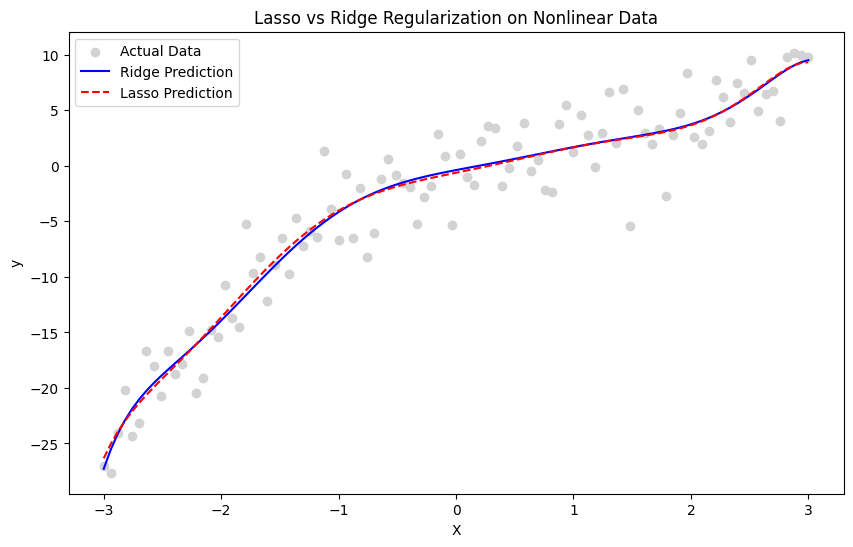

In [9]:
# 2. REGULARIZATION (LASSO and RIDGE)

# Nonlinear data (to demonstrate overfitting)
np.random.seed(42)
X_nonlin = np.linspace(-3, 3, 100)
y_nonlin = 0.5 * X_nonlin**3 - X_nonlin**2 + 2 * X_nonlin + np.random.randn(100) * 3

# Polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=8)
X_poly = poly.fit_transform(X_nonlin.reshape(-1, 1))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_nonlin, test_size=0.2, random_state=42)

# Ridge Regression (L2)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

# Lasso Regression (L1)
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

print("\n===== REGULARIZATION RESULTS =====")
print("Ridge Coefficients:", np.round(ridge.coef_, 3))
print("Ridge MSE:", ridge_mse)
print("\nLasso Coefficients:", np.round(lasso.coef_, 3))
print("Lasso MSE:", lasso_mse)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_nonlin, y_nonlin, color='lightgray', label='Actual Data')
plt.plot(X_nonlin, ridge.predict(X_poly), color='blue', label='Ridge Prediction')
plt.plot(X_nonlin, lasso.predict(X_poly), color='red', linestyle='--', label='Lasso Prediction')
plt.title("Lasso vs Ridge Regularization on Nonlinear Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()